Language of logic parser is somewhat simpler than language of arithmetic.

```xml
<expr> ::= { <term> "imp" } <term> | <term> { ( "iff" | "xor") <term> }
<term> ::= <factor> { ("and" | "or") <factor> }
<factor> ::= '(' <expr> ')' | { "not" } <atom>
<atom> ::= [A-Z] { [A-Za-z0-9_] } | "bot"
```

In [3]:
# Author: Joohee Jeong
# Version: 2021.05.28
# Description: Use line 5-6 in Google Colab if logic_parse.py is not uploaded.

url = 'https://raw.githubusercontent.com/jhjeong314/Proofmood/main'
import httpimport
with httpimport.remote_repo(url):
  from logic_parse import *
  
# from logic_parse import *

def testParser(input_text, showOption='polish', showOperType=False):
  # showOption ::= 'polish' | 'RPN' | 'infix_latex' | 'tree' | 'bussproof'
  # showOperType has effect only when showOption == 'polish' or 'RPN'
  from IPython.display import display, Math

  try:
    ast = parse_text(input_text)
  except ValueError as e:
    print(f"ValueError: {e}")
  except SyntaxError as e:
    print(f"SyntaxError: {e}")
  else:
    if showOption=='polish':
      print(ast.build_polish_notation(showOperType))
    elif showOption=='RPN':
      print(ast.build_RPN(showOperType))
    elif showOption=='infix_latex':
      s = ast.build_infix_latex()
      print(s) # latex source text
      display(Math(f"${s}$"))
    elif showOption=='tree':
      ast.draw_tree()
    elif showOption=='bussproof':
      s = ast.build_bussproof() 
      print(s)
    else:
      raise ValueError(f"Invalid showOption: {showOption}")

(A \wedge B \leftrightarrow \neg (\neg B \wedge A) \vee \bot) \rightarrow \neg C


<IPython.core.display.Math object>

\begin{prooftree}
\AxiomC{$A$}
\AxiomC{$B$}
\BinaryInfC{$\wedge$}
\AxiomC{$B$}
\UnaryInfC{$\neg$}
\AxiomC{$A$}
\BinaryInfC{$\wedge$}
\UnaryInfC{$\neg$}
\AxiomC{$\bot$}
\BinaryInfC{$\vee$}
\BinaryInfC{$\leftrightarrow$}
\AxiomC{$C$}
\UnaryInfC{$\neg$}
\BinaryInfC{$\rightarrow$}
\end{prooftree}


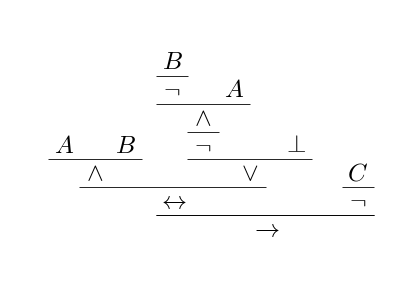

In [4]:
input_formula = "A and B iff not (not (B) and A) or bot imp (not C)"
testParser(input_formula, 'infix_latex')
testParser(input_formula, 'tree')
testParser(input_formula, 'bussproof')

A \wedge B \wedge C


<IPython.core.display.Math object>

\begin{prooftree}
\AxiomC{$A$}
\AxiomC{$B$}
\BinaryInfC{$\wedge$}
\AxiomC{$C$}
\BinaryInfC{$\wedge$}
\end{prooftree}


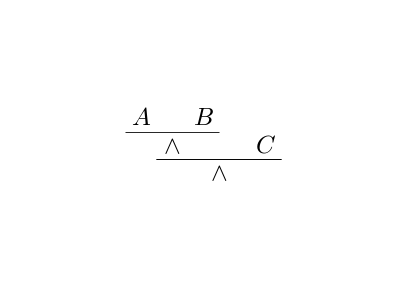

In [3]:
input_formula = "A and B and C" # associativity
testParser(input_formula, 'infix_latex')
testParser(input_formula, 'tree')
testParser(input_formula, 'bussproof')

(A \wedge B) \vee C


<IPython.core.display.Math object>

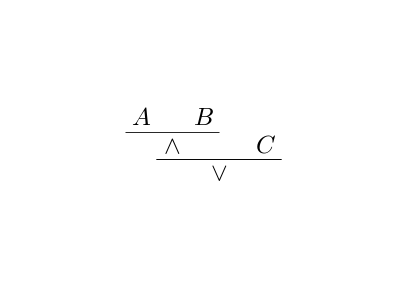

In [4]:
input_formula = "A and B or C" # works but not recommended
testParser(input_formula, 'infix_latex')
testParser(input_formula, 'tree')

(A \wedge B) \vee C


<IPython.core.display.Math object>

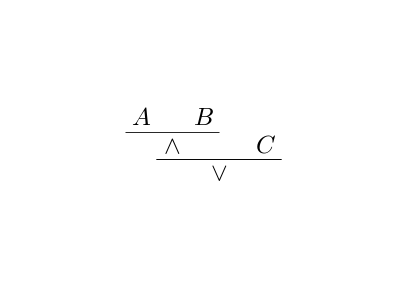

In [5]:
input_formula = "(A and B) or C" # recommended
testParser(input_formula, 'infix_latex')
testParser(input_formula, 'tree')

A \wedge (B \vee C)


<IPython.core.display.Math object>

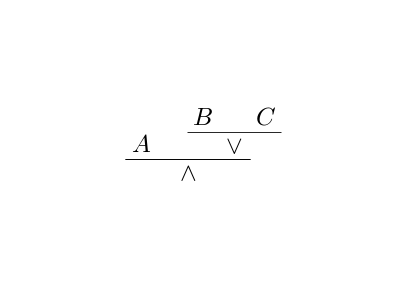

In [6]:
input_formula = "A and (B or C)" # works as expected
testParser(input_formula, 'infix_latex')
testParser(input_formula, 'tree')

imp not A imp B and not C D
A not B C not D and imp imp
\neg A \rightarrow B \rightarrow \neg C \wedge D


<IPython.core.display.Math object>

\begin{prooftree}
\AxiomC{$A$}
\UnaryInfC{$\neg$}
\AxiomC{$B$}
\AxiomC{$C$}
\UnaryInfC{$\neg$}
\AxiomC{$D$}
\BinaryInfC{$\wedge$}
\BinaryInfC{$\rightarrow$}
\BinaryInfC{$\rightarrow$}
\end{prooftree}


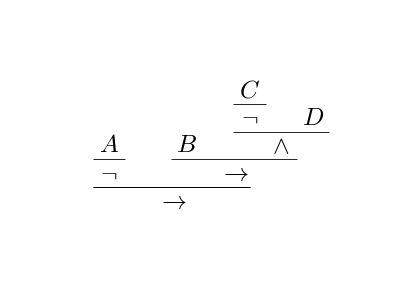

In [9]:
input_formula = "not A imp B imp not C and D"
testParser(input_formula) # default: polish notation
testParser(input_formula, 'RPN')
testParser(input_formula, 'infix_latex')
testParser(input_formula, 'tree')
testParser(input_formula, 'bussproof')

imp not A_Cat_ij imp Bob and not C_1 D_12
A_Cat_ij not Bob C_1 not D_12 and imp imp
\neg {\rm A\_Cat}_{ij} \rightarrow {\rm Bob} \rightarrow \neg C_{1} \wedge D_{12}


<IPython.core.display.Math object>

\begin{prooftree}
\AxiomC{${\rm A\_Cat}_{ij}$}
\UnaryInfC{$\neg$}
\AxiomC{${\rm Bob}$}
\AxiomC{$C_{1}$}
\UnaryInfC{$\neg$}
\AxiomC{$D_{12}$}
\BinaryInfC{$\wedge$}
\BinaryInfC{$\rightarrow$}
\BinaryInfC{$\rightarrow$}
\end{prooftree}


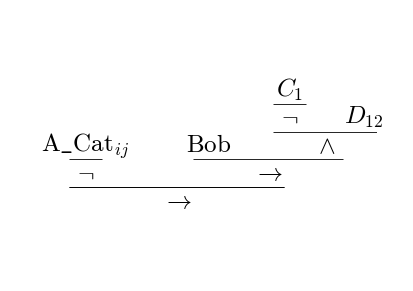

In [8]:
input_formula = "not A_Cat_ij imp Bob imp not C_1 and D_12"
testParser(input_formula)
testParser(input_formula, 'RPN')
testParser(input_formula, 'infix_latex')
testParser(input_formula, 'tree')
testParser(input_formula, 'bussproof')